In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath("..")) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from models import kane_mele
from pythtb import *
from wanpy import *

In [3]:
# tight-binding parameters
onsite = 1.0  # 1.0 for top, 2.5 for triv
t = 1
soc = 0.6*t*0.5
rashba = 0.25*t

n_supercell = 3
model = kane_mele(onsite, t, soc, rashba).make_supercell([[n_supercell, 0], [0, n_supercell]])

In [4]:
n_orb = model.get_num_orbitals()
lat_vecs = model.get_lat()
orb_vecs = model.get_orb()
n_occ = int(n_orb/2)*2
low_E_sites = list(np.arange(0, n_orb, 2))
high_E_sites = list(np.arange(1, n_orb, 2))

model_name = "kane_mele"
model_str = f't={t}_soc={soc}_onsite={onsite}_n_occ={n_occ}'
name = f'Wan_frac_{model_name}_{model_str}'
sv_dir = 'data'
if not os.path.exists(sv_dir):
    os.makedirs(sv_dir)

In [5]:
spread_dict = np.load(f"{sv_dir}/{name}_spread_dict.npy", allow_pickle=True)
spread_dict = spread_dict.item()
WFs = np.load(f"{sv_dir}/{name}_WF_16o18.npy", allow_pickle=True)
WFs = WFs.item()

# occupied bands: 18


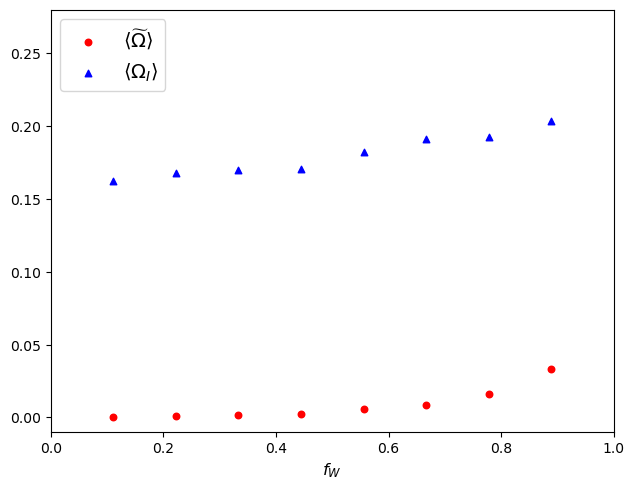

In [7]:
n_WFs = np.array(list(spread_dict.keys()))
Wf_frac = n_WFs/n_occ # Wannier fraction
omega_til_lst = np.array([spread['omega_til'] for spread in list(spread_dict.values())]) # omega tildes
omega_i_lst = np.array([spread['omega_i'] for spread in list(spread_dict.values())]) # omega_i s
avg_omega_til = omega_til_lst / n_WFs # normalize spread 
avg_omega_i = omega_i_lst / n_WFs # normalize spread

print(f"# occupied bands: {n_occ}")

plt.scatter(Wf_frac, avg_omega_til, c='r', s=22, marker='o', label=r'$\langle \widetilde{\Omega} \rangle$') # / # Wannier functions
plt.scatter(Wf_frac, avg_omega_i, c='b', s=22, marker='^', label=r'$\langle \Omega_I \rangle$')

# plt.ylabel(r'$\langle \widetilde{\Omega} \rangle$', size=12)
# plt.xlabel(r'$n_{W}\ /\ n_{\rm occ}$', size=12)
plt.xlabel(r'$f_{W}$', size=12)

# plt.title(r"C=-1.0 $\Delta$ = 1 $t_0=0.4$ $t'=0.5$")
plt.ylim(-0.01, .28)
plt.xlim(0, 1.0)
plt.legend(loc='upper left', fontsize=14)

plt.subplots_adjust(top=0.98, left=0.1, bottom=0.1, right=0.98)

# save_name = f'Delta={delta}_t={t}_t_2={t2}_n_occ={n_occ}'
# plt.savefig(f'images/Wan_frac_{model_str}.png', dpi=700)

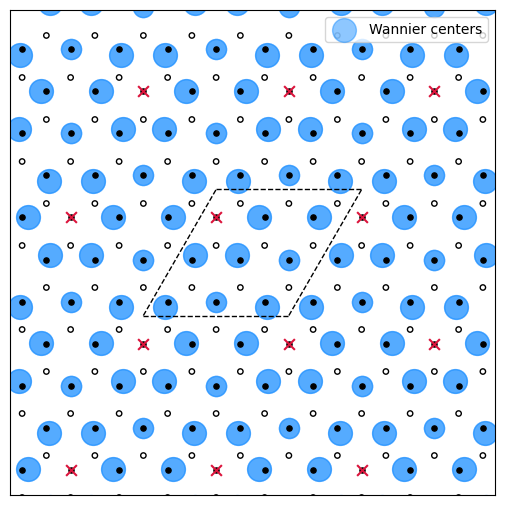

In [8]:
Wf = WFs
n_wfs = WFs.n_twfs
trial_wfs = Wf.trial_wfs
delta_sites = np.sort(np.array([int(np.where(trial_wfs[i]!=0)[0][0]) for i in range(trial_wfs.shape[0])]))
omit_sites = np.setdiff1d(low_E_sites, delta_sites)


kwargs_centers = {'marker': 'o', 'c': 'dodgerblue', 'alpha': 0.5} 
# kwargs_centers = {'marker': '*', 'c': 'dodgerblue', 'alpha': 0.6} 
kwargs_omit = {'s': 60, 'marker': 'x', 'c': 'crimson', 'zorder': 3} 
# kwargs_omit = {'s': 60, 'marker': 'x', 'c': 'k', 'zorder': 3} 
kwargs_lat_ev = {'s': 14, 'marker': 'o', 'c': 'k'} 
kwargs_lat_odd = {'s': 15, 'marker': 'o', 'facecolors':'none', 'edgecolors':'k'} 

fig, ax = plt.subplots(figsize=(5,5))

fig, ax = plot_centers(Wf,
    center_scale=20, omit_sites=omit_sites, section_home_cell=True, 
    color_home_cell=False, translate_centers=True, kwargs_centers=kwargs_centers, 
    kwargs_lat_ev=kwargs_lat_ev, kwargs_lat_odd=kwargs_lat_odd,
    kwargs_omit=kwargs_omit, pmx=5, pmy=5, legend=True, 
    fig=fig, ax=ax)

ax.set_xticks([])
ax.set_yticks([])
# ax.set_title('')
ax.set_aspect('equal')

save_name = f'fig14_Wan_centers_{model_str}_nWfs={n_wfs}'
sv_dir = 'figures'
file_name = f"{sv_dir}/{save_name}_centered.png"

plt.subplots_adjust(top=0.98, left=-0.2, bottom=0.01, right=1.2)
plt.savefig(file_name, dpi=700, bbox_inches='tight')

In [ ]:
np.sqrt((3*np.sqrt(3)*0.3)**2 - 4*0.25**2)